# Project: Investigate a Dataset (No-show Appointments Data Set)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains information from over 100,000 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The dataset contains 14 columns which include patient information, scheduled day, appointment day, age, location of hospital, enrolment in scholarship program or not, patient health issues, if patients received SMS notification and finally the status of the show-up.

## Questions

<li>What is the relationship between Gender and no shows?</li>
<li>What is the relationship between Age and patients who showed up?</li>
<li>What is the relationship between hypertension and patients who showed up?</li>
<li>What is the relationship between SMS received and patients who showed up?</li>

In [1]:
# Import statements for all of the packages that we will be using

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading the data. Performing some operations to inspect data
# types and look for instances of missing or possibly odd data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Checking if there is any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We have 110,527 entries and 14 columns with no "null" fields.

In [4]:
# Check number of rows and columns for this dataset
df.shape

(110527, 14)

In [5]:
# Shows the summary of the data we have
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Observations:
<br>
1- One patient's age is -1 and while another one is 115 - Need to be fixed.<br>
2- Hipertension and Handcap words are misspelled.<br>
3- No-show preferred to be No_show.

In [6]:
# Check for any duplicate values
df.duplicated().any()

False

No Duplicate values found.

### Data Cleaning

In [7]:
# Performing cleaning steps to make sure that the next steps will run smoothly. 

# Checking how many patients are less than 0 Age
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


One entry with -1 years old. This need to be cleaned.

In [8]:
# Checking how many patients are more than 100 Age
df[df.Age > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


Five entries with 115 years old. This need to be cleaned.

In [9]:
# We will remove any discrepancies in terms of age i.e. patients with -1 and 115 years old
df = df[(df.Age > -1) & (df.Age < 115)]

In [10]:
# double check to see if the above values were removed (-1 years old)
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [11]:
# double check to see if the above values were removed (-115 years old)
df[df.Age > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No


In [12]:
# Renaming missplelled columns
df.rename(columns = {'Hipertension': 'Hypertension','Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [13]:
# Checking that columns were renamed
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# Checking data types especially the "No_show" column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hypertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handicap        110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No_show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [15]:
# Changing data type for the No_show column. We will use 0 for NO and 1 for Yes
df['No_show'].replace({'No':0,'Yes':1}, inplace=True)

In [16]:
#Double checking that data type were changed.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hypertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handicap        110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No_show         110521 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 12.6+ MB


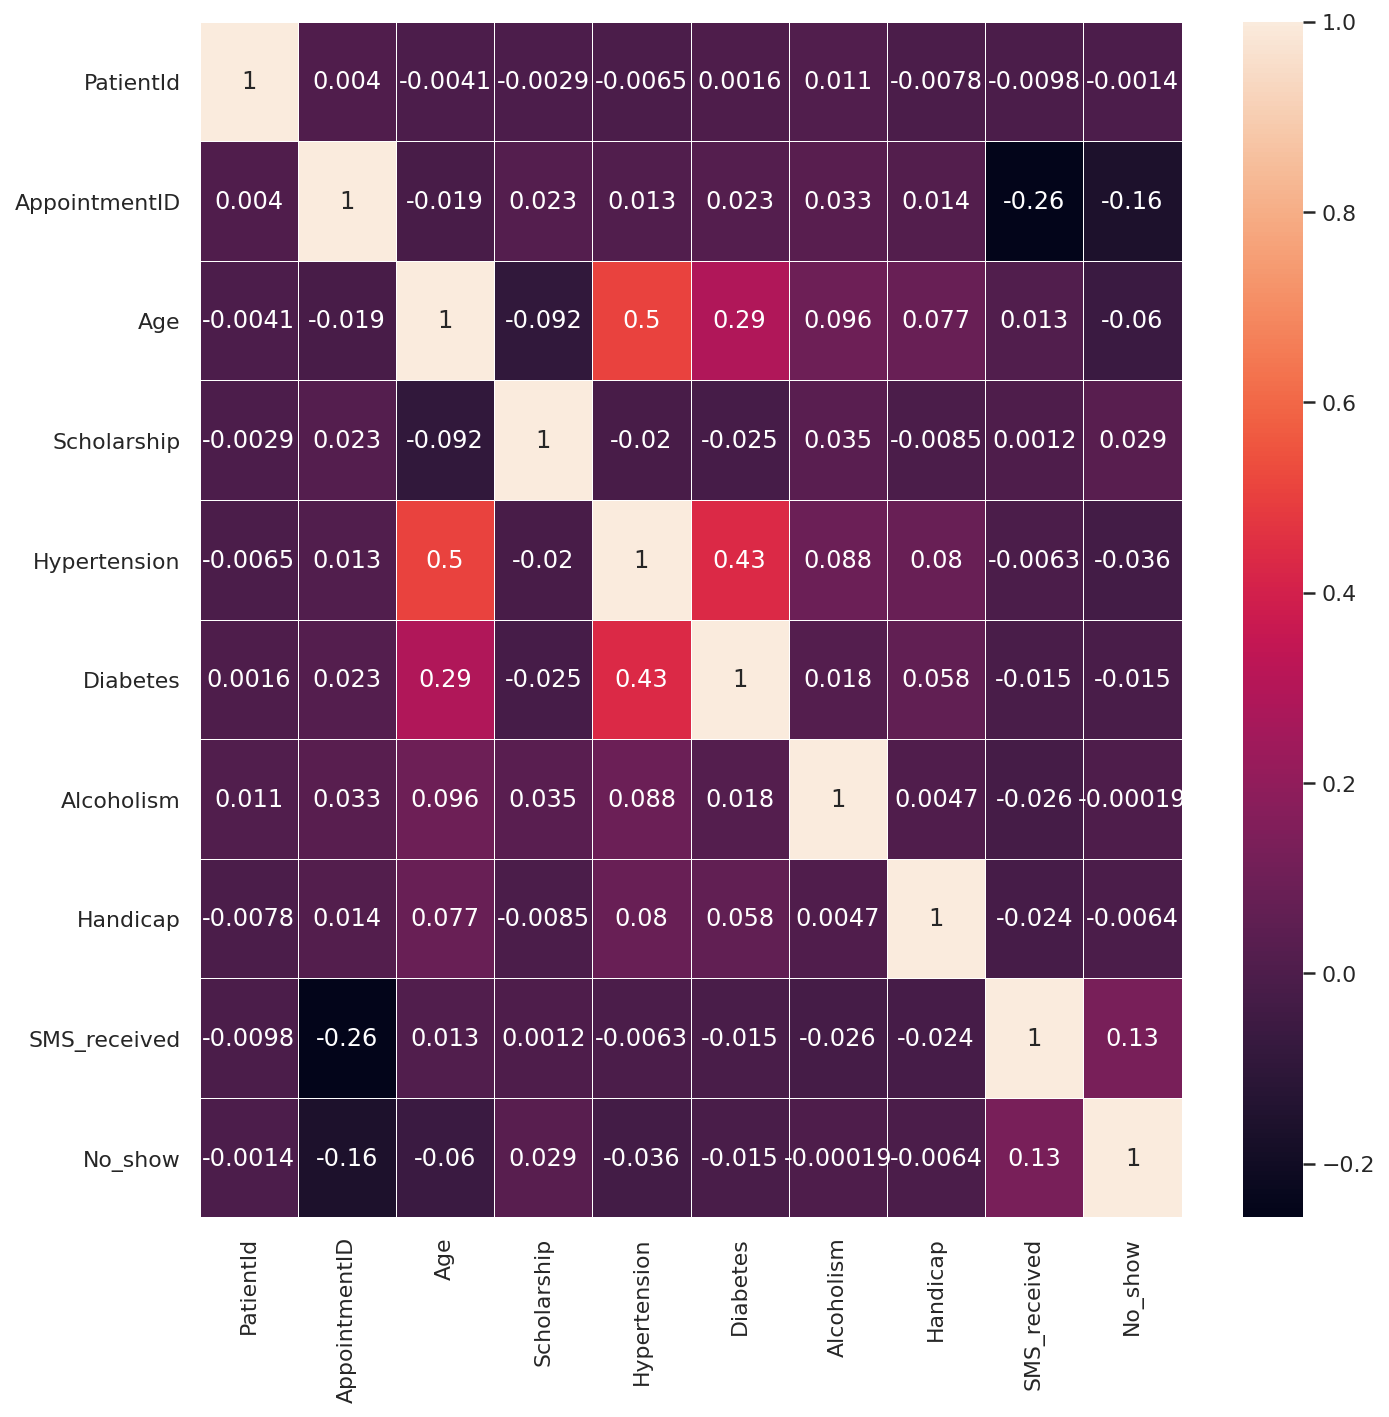

In [17]:
# Drawing a correlation matrix to see if there is any correlation between the parameters and the No show feature.
Correlation_Matrix = df.corr()
sns.set(rc={'figure.figsize':(11,11)})
sns.heatmap(Correlation_Matrix, linewidths=.5, annot=True, linecolor='white')
plt.show()

According to the above heatmap, it doesn't seem that there is a solid correlation between the parameters and the showing up for appointments. There is some correlation between Age/Hypertension & Age/Diabetes.

In [18]:
# Creating a differentiation between patients who showed and who didn't show. 2 New columns should be created.

patients_showed = df['No_show'] == 0
patients_not_showed = df['No_show'] == 1
df['patients_showed'] = patients_showed
df['patients_not_showed'] = patients_not_showed

In [19]:
# Checking to see if the 2 new columns were created or not.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,patients_showed,patients_not_showed
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,False
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False


In [20]:
# Creating a function to create histograms for any column. The graph will compare between patients that showed up/Did not show up and other parameters.
def column_histo(column_name = ""):
  
    df[column_name][patients_showed].hist(alpha=.9,label='Showed Up')
    df[column_name][patients_not_showed].hist(alpha=.9,label='Did Not Show Up')
    plt.title('Comparison between patients who showed up and were suffering from {}'.format(column_name))
    plt.xlabel('{}'.format(column_name))
    plt.ylabel('Number of patients')
    plt.legend()
    plt.show()

<a id='eda'></a>
## Exploratory Data Analysis


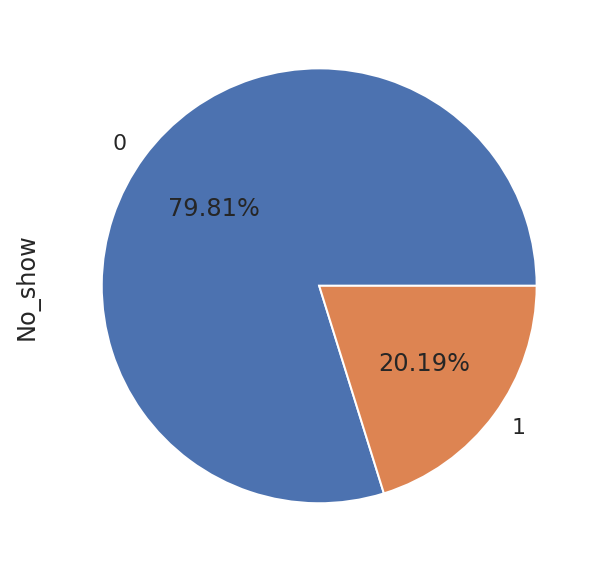

In [21]:
# Create a pie chart to show the % of show to no show
df.No_show.value_counts().plot.pie(figsize=(5,5), autopct='%.2f%%')
plt.show()

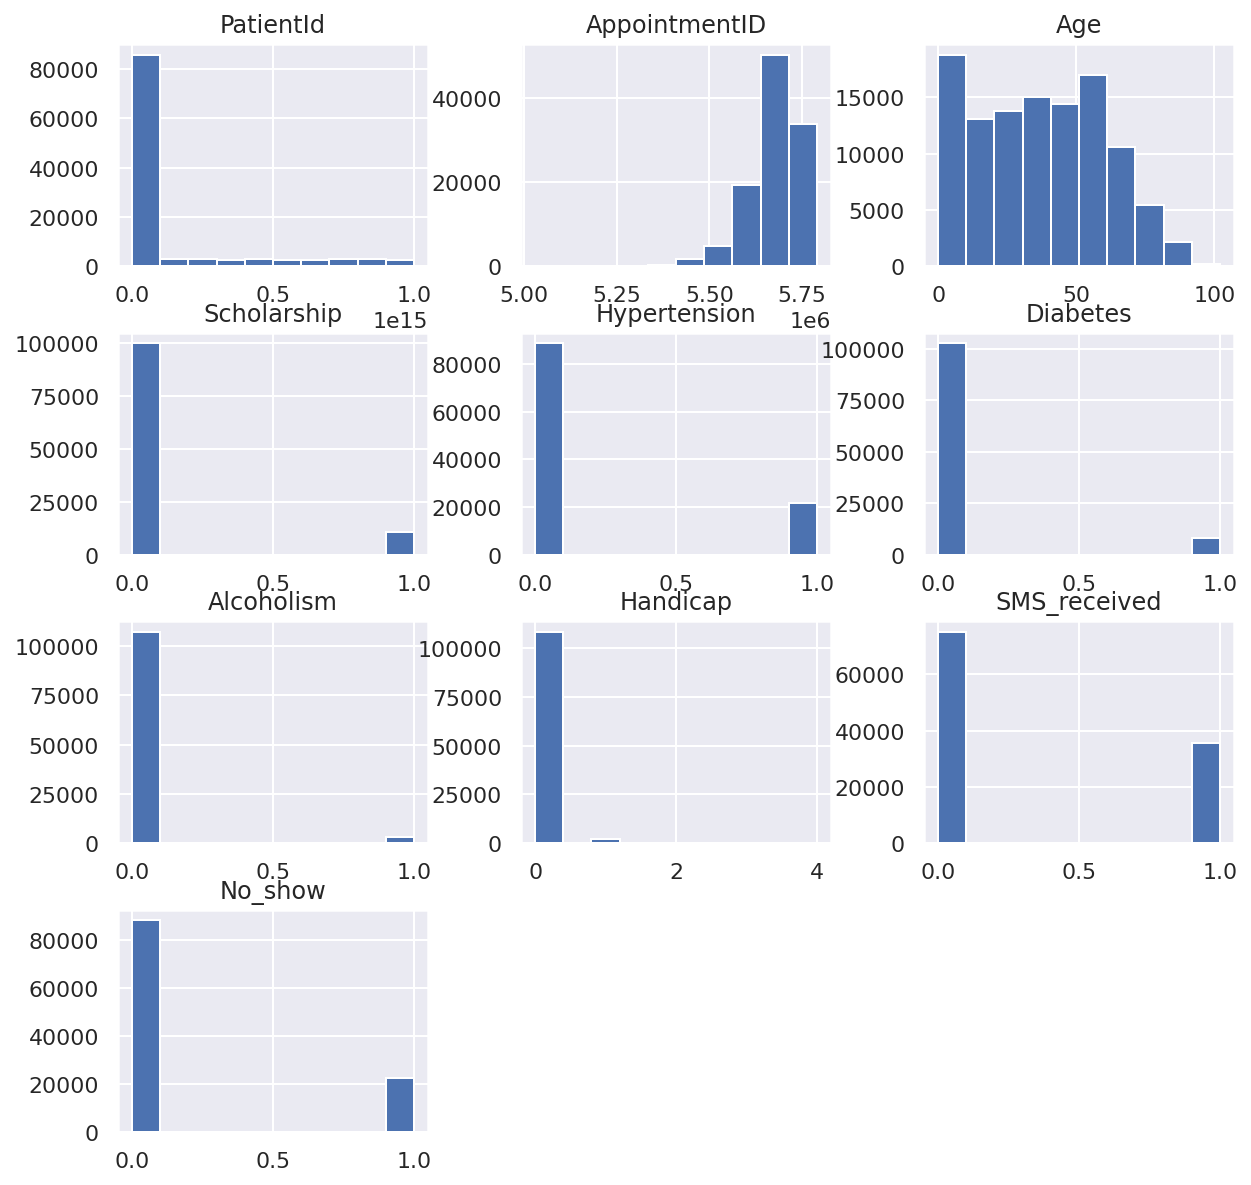

In [22]:
# Gathering more information about the dataset we have
df.hist(figsize=(10,10));

Most of the patients don't suffer from health issues like hypertension, diabetes, alcoholism and handicapping.<br>
Most of the patients didn't have scholarships.<br>
Most of the patients didn't receive the SMS. 

In [23]:
# Checking the mean value of all issues and their relation to the "No_show" factor.
columns_of_df = ['Scholarship','Hypertension','Diabetes','Alcoholism','SMS_received']
for v in columns_of_df :
    print(df.groupby(v)['No_show'].mean())

Scholarship
0    0.198053
1    0.237363
Name: No_show, dtype: float64
Hypertension
0    0.209015
1    0.173028
Name: No_show, dtype: float64
Diabetes
0    0.203611
1    0.180033
Name: No_show, dtype: float64
Alcoholism
0    0.201930
1    0.201488
Name: No_show, dtype: float64
SMS_received
0    0.167004
1    0.275753
Name: No_show, dtype: float64


Alcoholism has nothing to do with showing up.

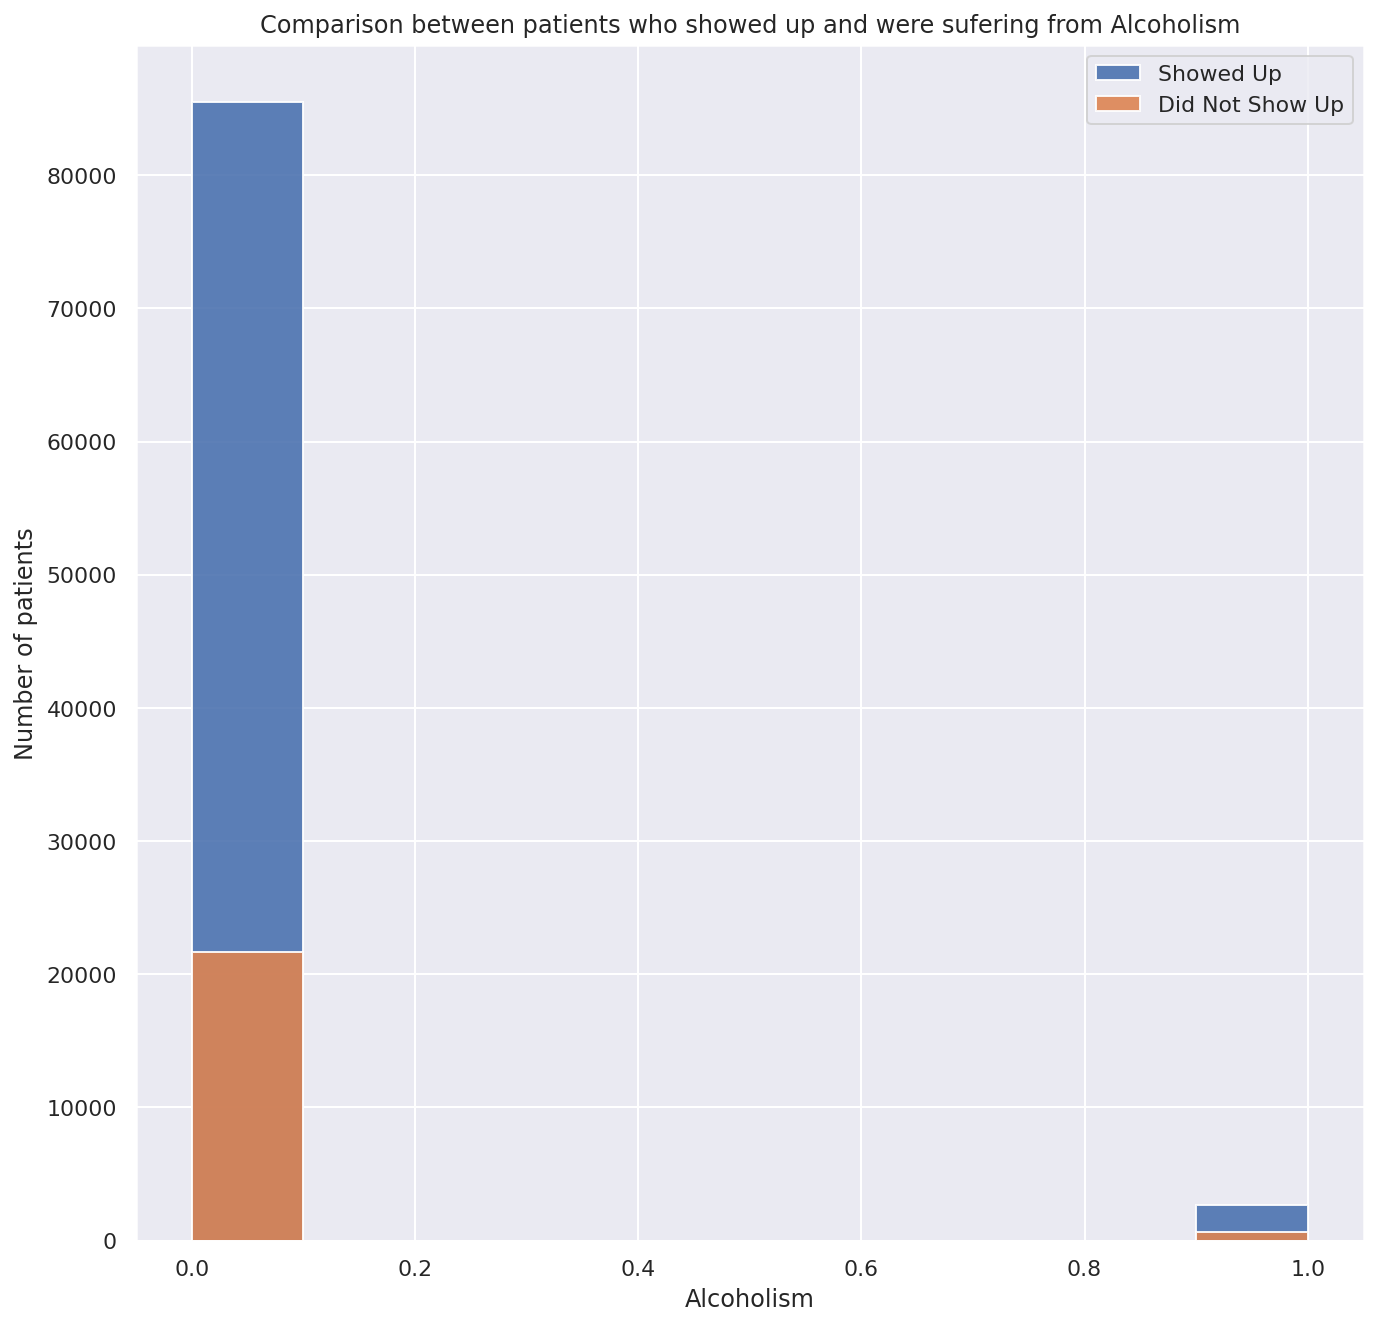

In [24]:
# Using the previously created function to draw a histogram and to know the relationship between Alcoholism and patients that showed up or didn't show up.
column_histo(column_name = "Alcoholism")

### Research Question 1 (What is the relationship between Gender and no shows?)

Gender
F    0.203121
M    0.199679
Name: No_show, dtype: float64


Text(0.5, 1.0, 'Relation between Gender and shows')

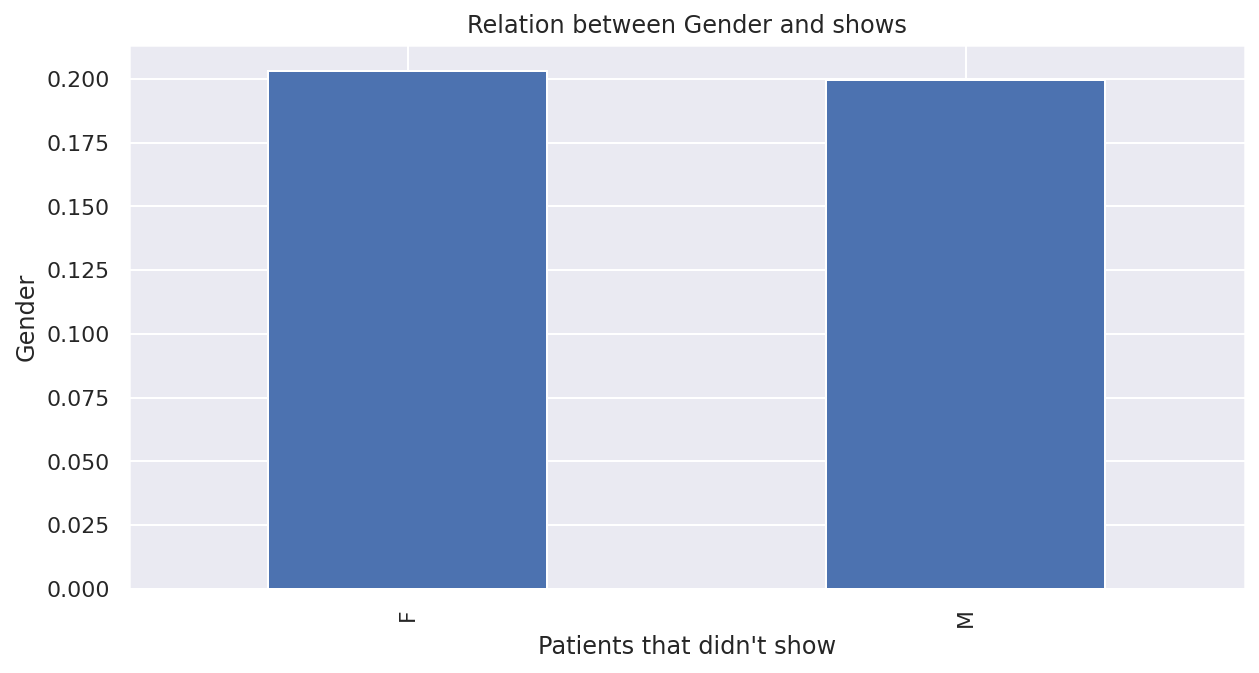

In [25]:
# Finding the relationship between the Gender of patients and how many of them went to the appointment.

print(df.groupby('Gender')['No_show'].mean())
df.groupby('Gender')['No_show'].mean().plot(kind='bar',figsize=(10,5));
plt.xlabel("Patients that didn't show")
plt.ylabel("Gender")
plt.title("Relation between Gender and shows")

Gender doesn't affect whether the patient is attending the appointment or not.<br>
Females have slightly higher percent of No shows.

### Research Question 2 (What is the relationship between Age and patients who showed up?)

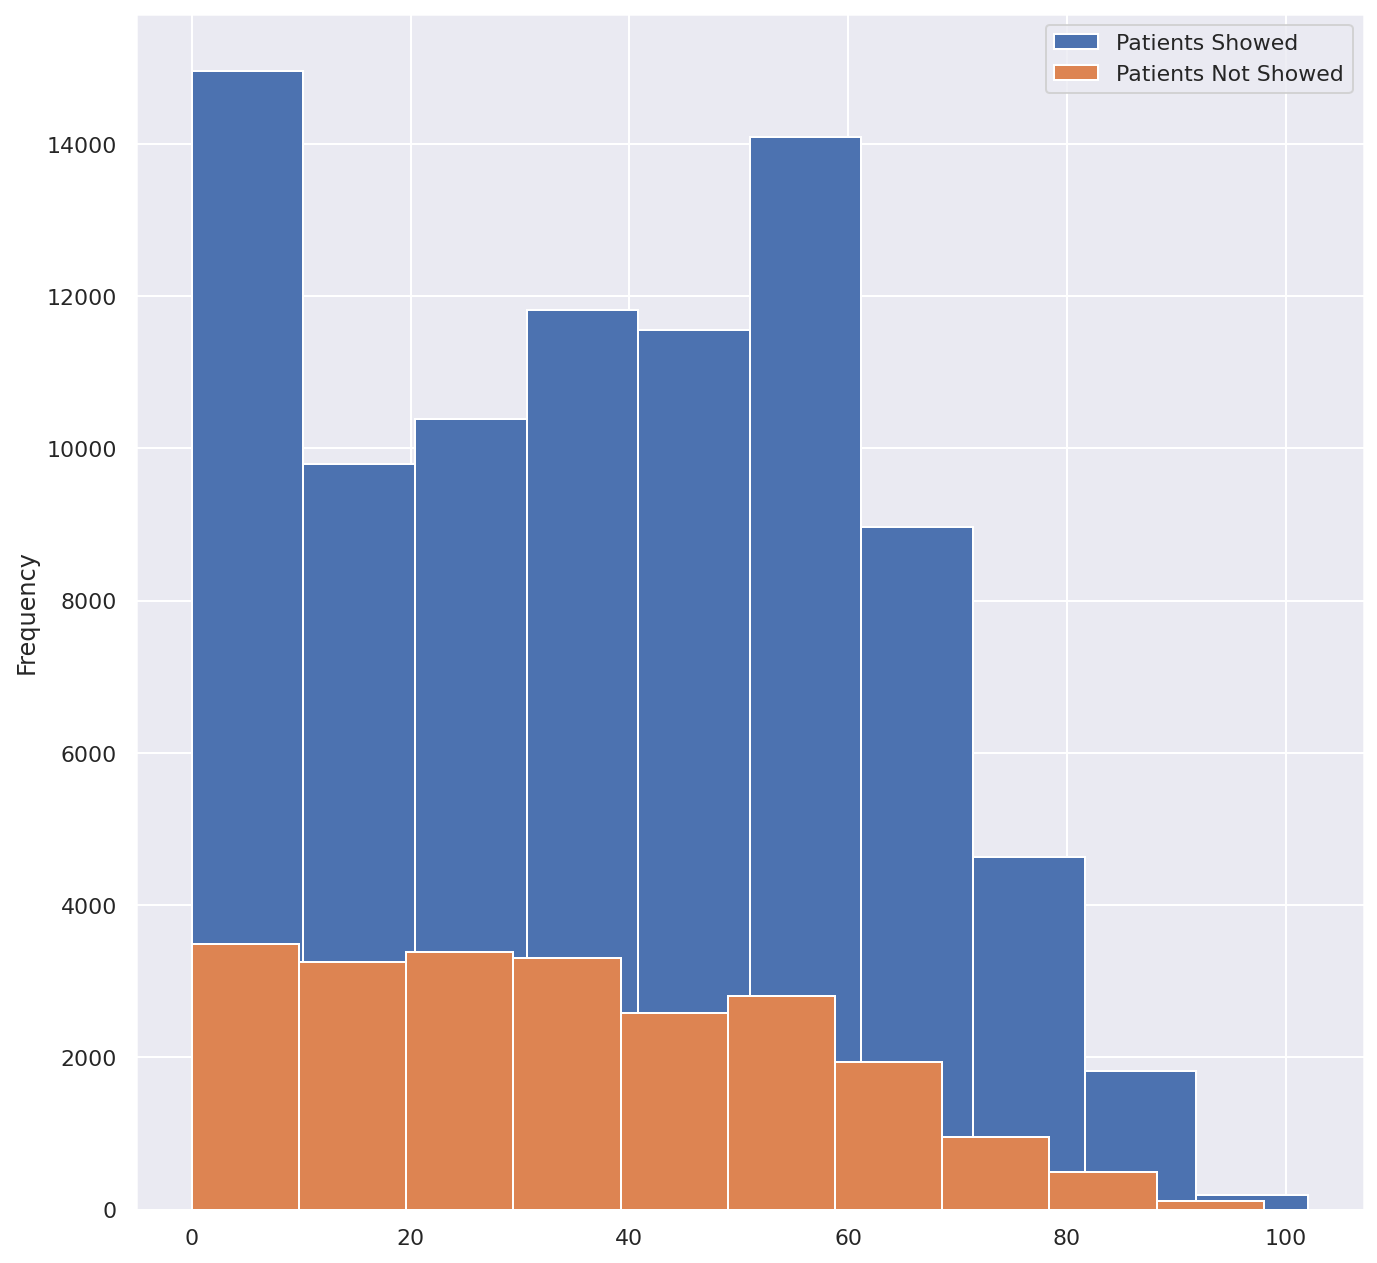

Patients Showed Average Age:37.789
Patients Not Showed Average Age:34.307


In [26]:
# Finding the relationship between the Age of patients and how many of them went to the appointment.

df[patients_showed].Age.plot.hist()
df[patients_not_showed].Age.plot.hist()
plt.legend(['Patients Showed', 'Patients Not Showed'])
plt.show()
print('Patients Showed Average Age:{:.3f}'.format(df[patients_showed].Age.mean()))
print('Patients Not Showed Average Age:{:.3f}'.format(df[patients_not_showed].Age.mean()))

Age affect whether the patient is attending the appointment or not.<br>
The average age for patients that showed up were 37.789 , and the average age for people who didn't show up was 34.307.

 ### Research Question 3 (What is the relationship between hypertension and patients who showed up?)

Hypertension
0    0.209015
1    0.173028
Name: No_show, dtype: float64


Text(0.5, 1.0, "Relation between Hypertension and patients who didn't show up")

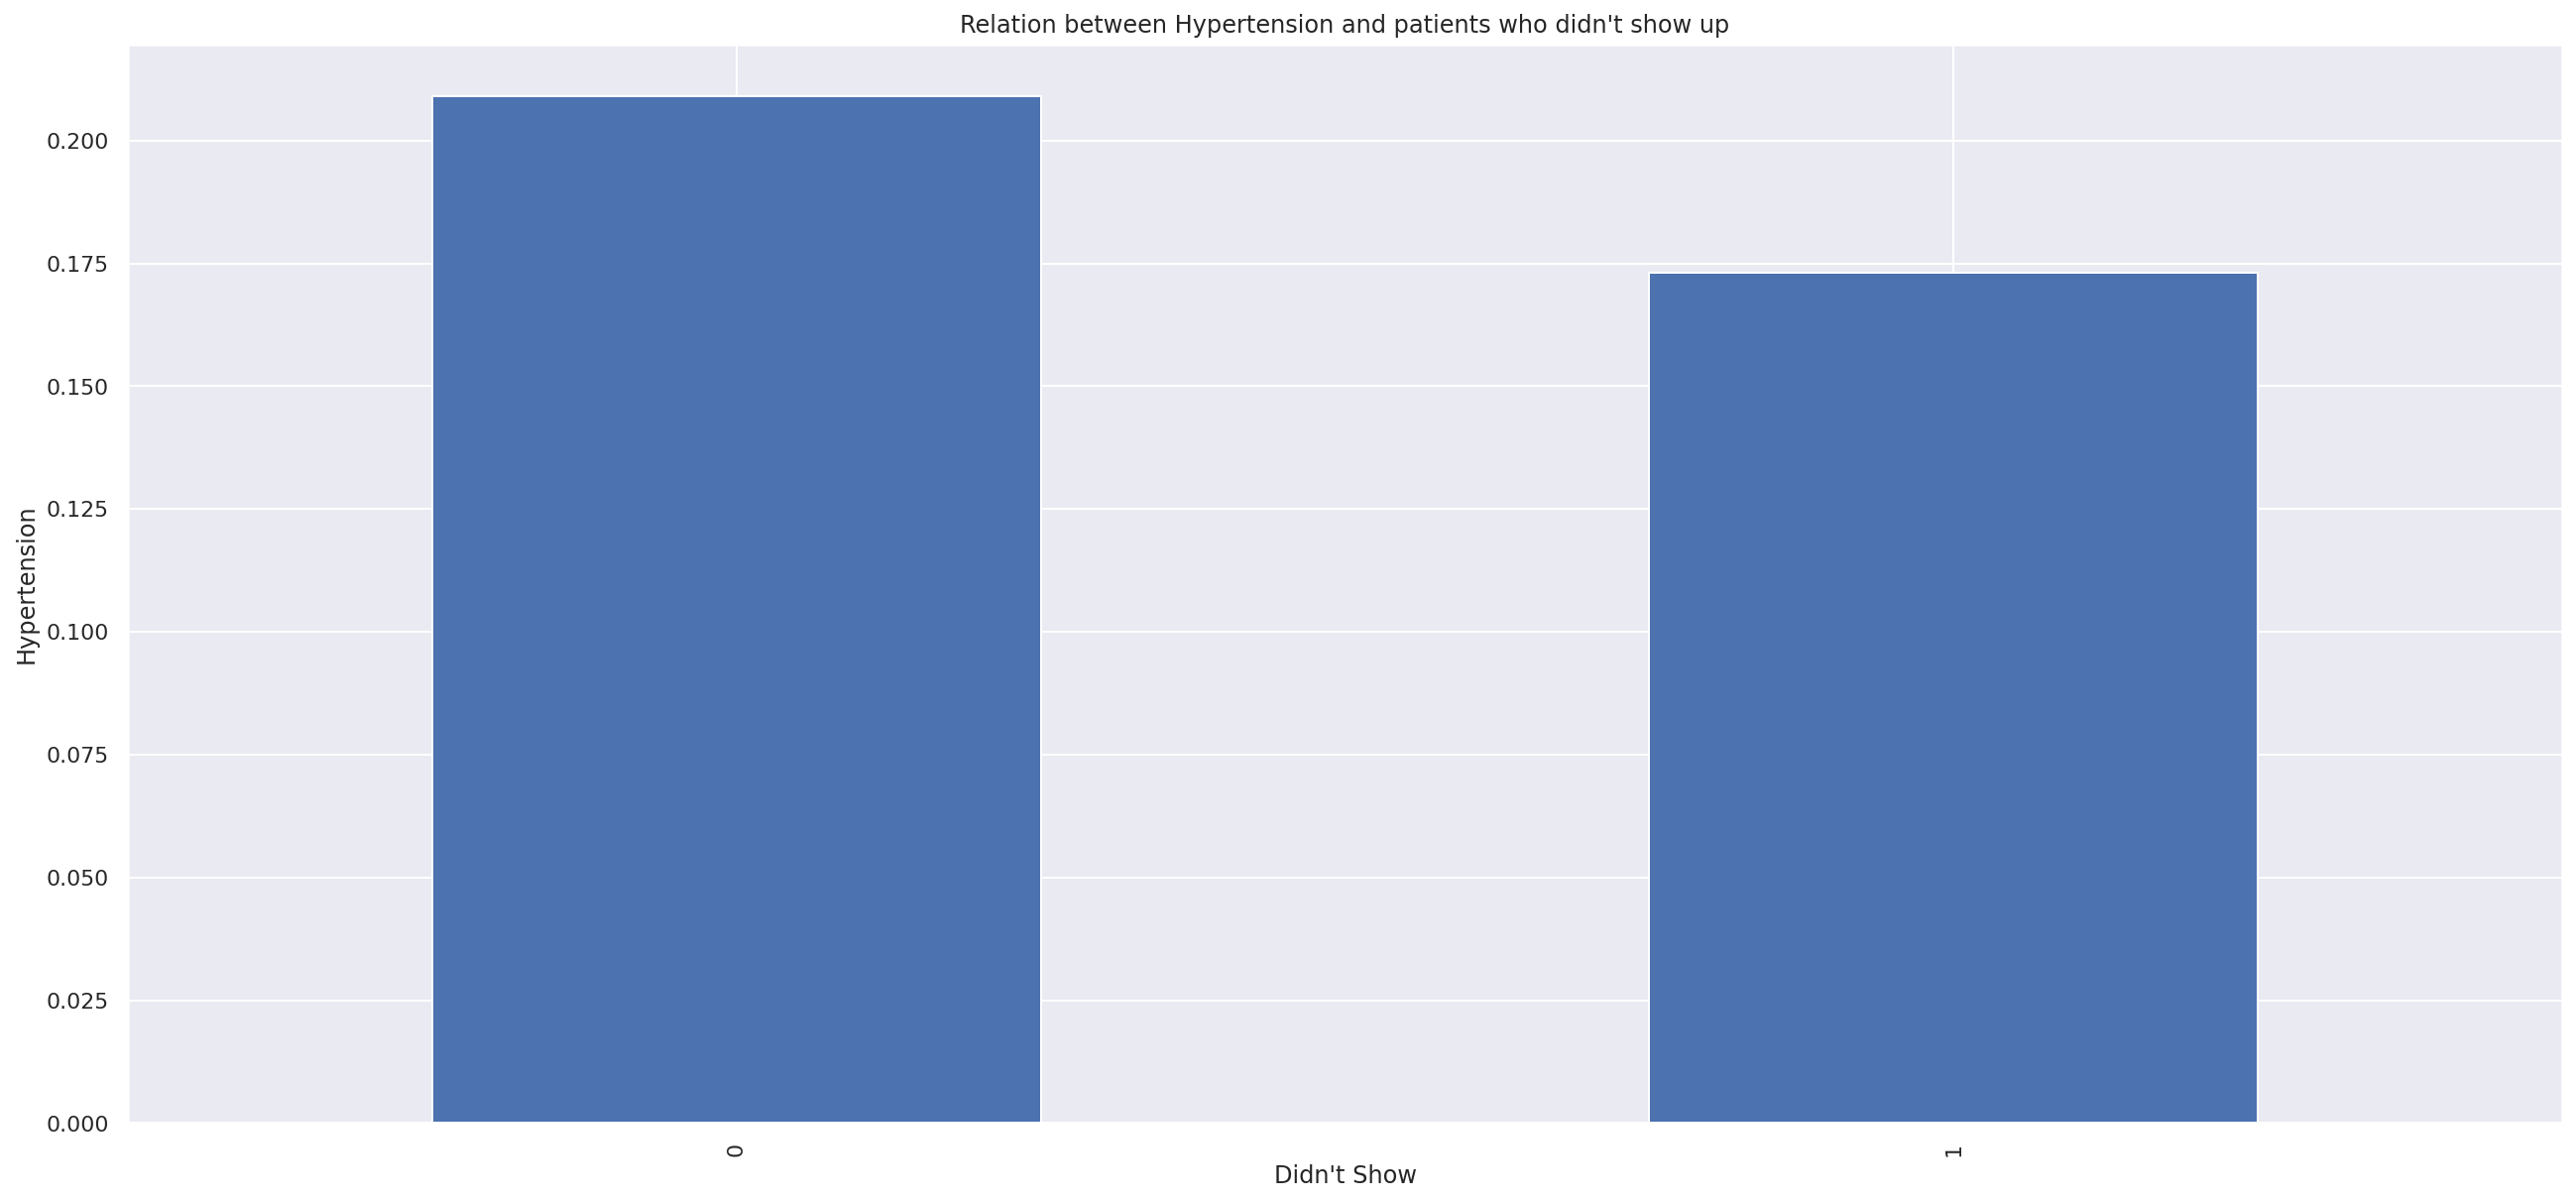

In [27]:
# Finding the relationship between patients who have hypertension and how many of them went to the appointment.

print(df.groupby('Hypertension')['No_show'].mean())
df.groupby('Hypertension')['No_show'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Didn't Show")
plt.ylabel("Hypertension")
plt.title("Relation between Hypertension and patients who didn't show up")

Hypertension slightly affected whether the patient is attending the appointment or not.<br>
Patients with hypertension were have slightly higher percent of showing up.

#### Research Question 4 (What is the relationship between SMS received and patients who showed up?)

SMS_received
0    0.167004
1    0.275753
Name: No_show, dtype: float64


Text(0.5, 1.0, "Relation between patients who received SMS and patients who didn't show up")

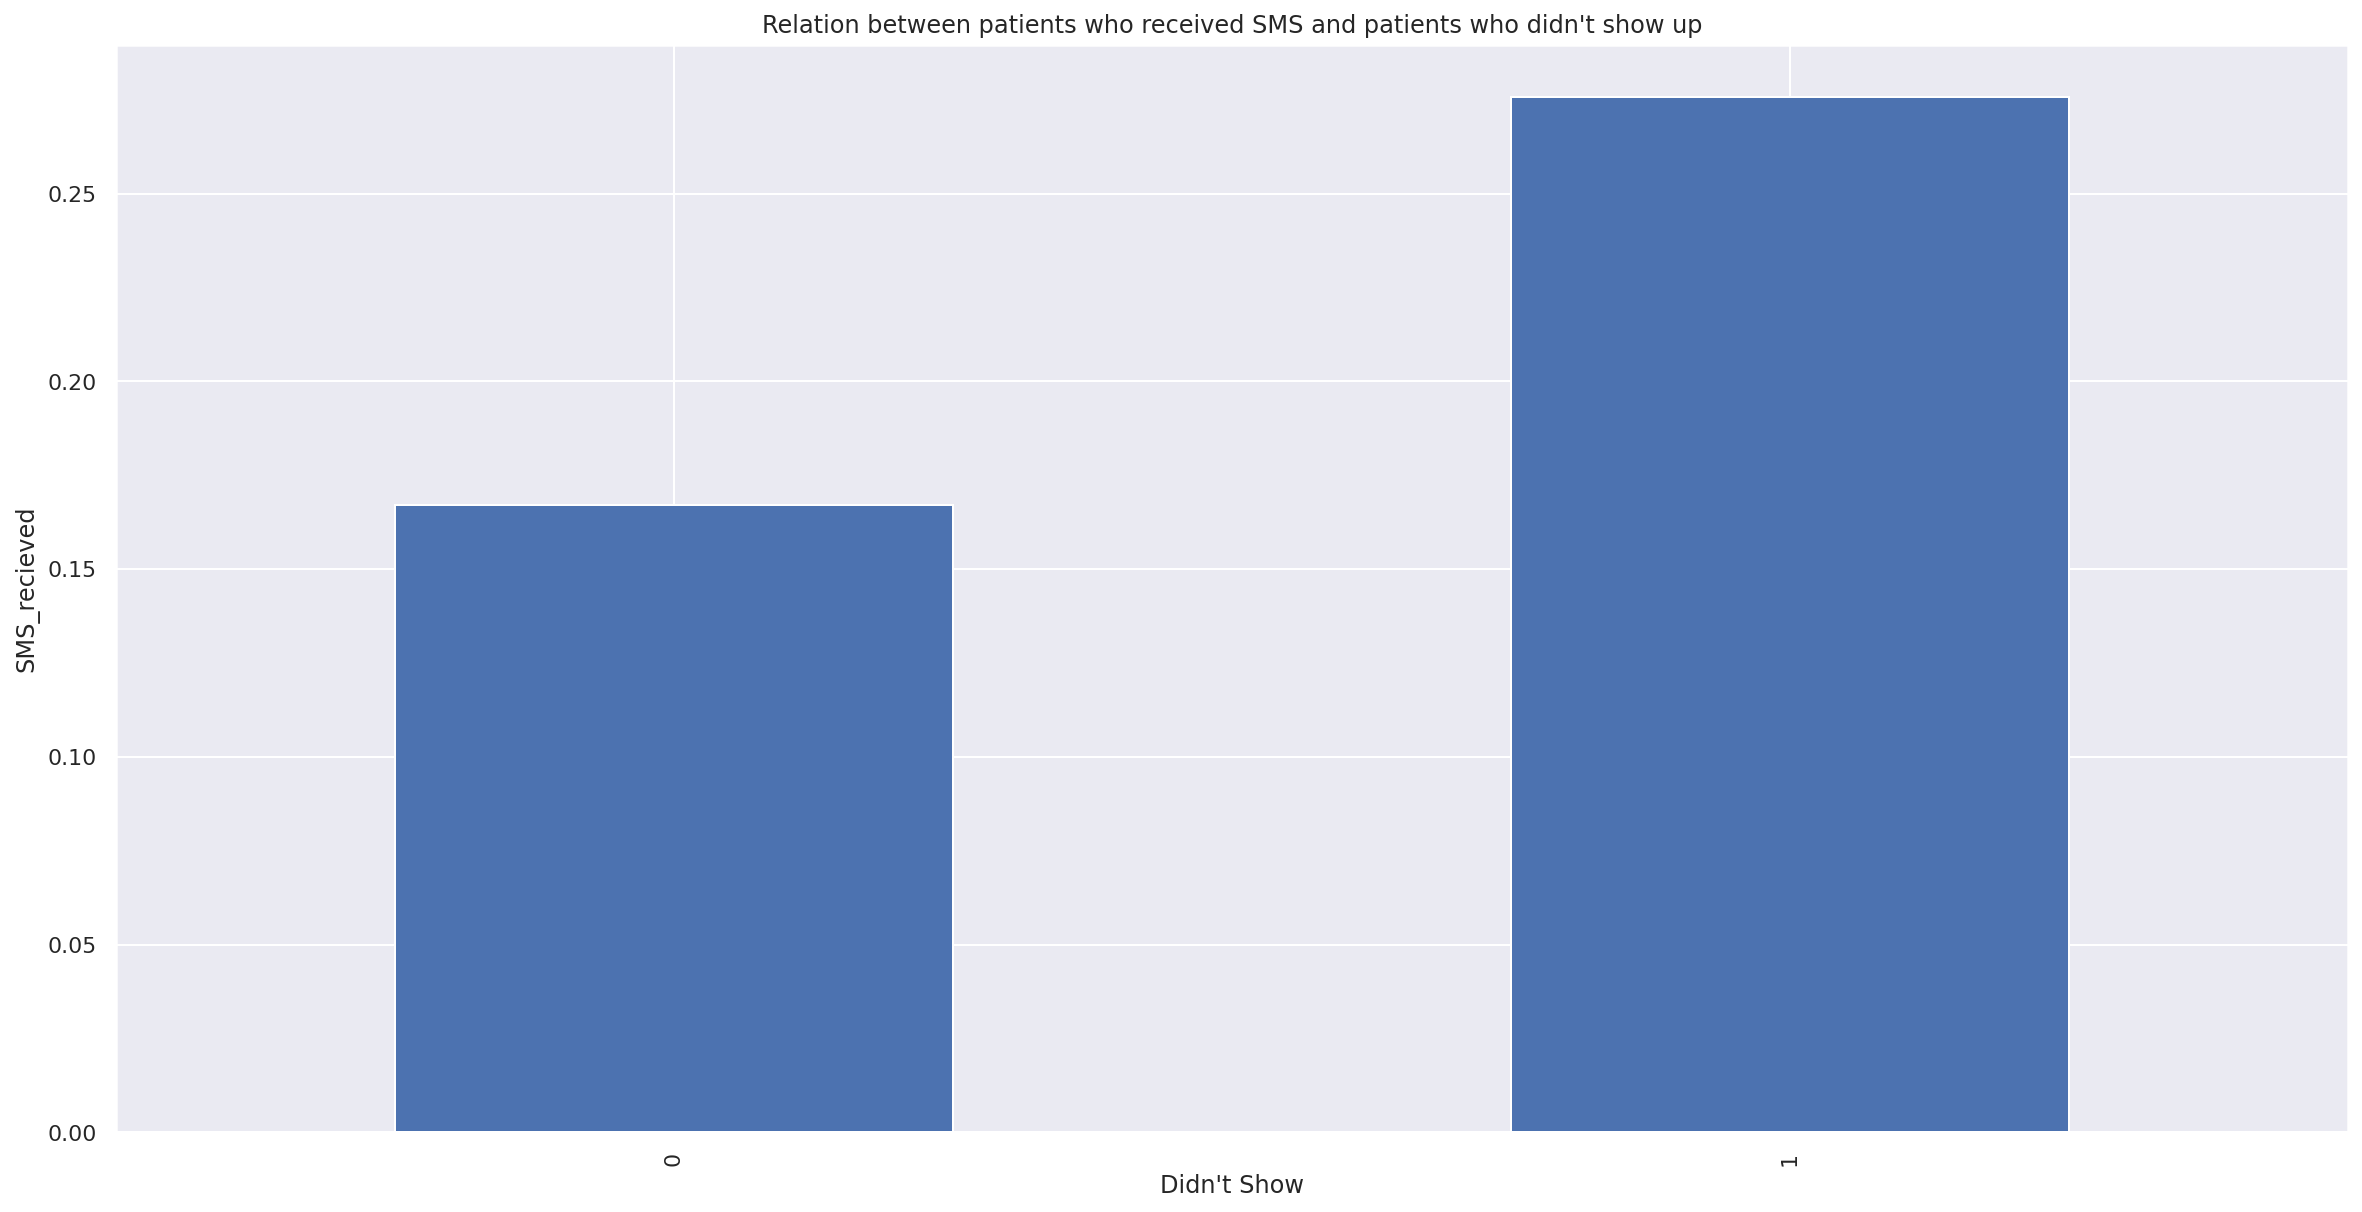

In [28]:
# Finding the relationship between patients who received SMS and how many of them went to the appointment.

print(df.groupby('SMS_received')['No_show'].mean())
df.groupby('SMS_received')['No_show'].mean().plot(kind='bar',figsize=(20,10));
plt.xlabel("Didn't Show")
plt.ylabel("SMS_recieved")
plt.title("Relation between patients who received SMS and patients who didn't show up")

Patients who received SMS were having lower % to attend the appointment.

<a id='Limitations'></a>
## Limitations 
<br>
<li>There were some unreasonable values in the dataset, like patients with age -1 and Zero.</li>
<li>It was not clear why patients received SMS were having lower percent of showing up.</li>
<li>The distance between the hospital and each patient was not provided.</li>
<li>Correlations between parameters were not promising to draw a strong conclusion.</li>
<li>I couldn't imply any causation from the correlation results.</li>
<li>More data about the patients was needed to be able to draw better conclusions and solid statistical analysis.</li>

<a id='conclusions'></a>
## Conclusions 
<br>
<li>About 79.8% of the patients went to their appointment.</li>
<li>Gender and Alcoholism didn't affect whether the patient is attending the appointment or not.</li>
<li>The Age affects whether the patient was attending the appointment or not. The average age for patients that showed up were 37.78 , and the average age for people who didn't show up was 34.3.</li>
<li>Hypertension slightly affected whether the patient is attending the appointment or not.</li>
<li>Patients with Scholarship were attending the appointment less than patients without. About 23.7% of patients with scholarships didn't show up compared to 19.8% of patients without.</li>
<li>Most of the patients didn't receive the SMS and amazingly, patients who received SMS were having lower % to attend the appointment. </li>
